In [1]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from ipywidgets import interact
%matplotlib inline

plt.style.use('ggplot')

palette_standard = {
    'white': 'white',
    'black': 'black',
    'green': 'green',
    'red':   'red',
    'purple': 'purple'
}
palette_gruv = {
    'white': '#f9f5d7',
    'black': '#3c3836',
    'green': '#98971a',
    'red':   '#cc241d',
    'purple': '#8f3f71',
    'blue': '#076678'
}
palette_colorblind = {
    'white': 'white',
    'black': 'black',
    'green': '#009e73',
    'red':   '#d55e00',
    'purple': '#cc79a7',
    'blue': '#0072b2'
}
palette = palette_colorblind

In [2]:
ds = {
    '2018' : pd.read_csv('../csv/pollution_detection/ds459_qaria_datoariagiornostazione_year-2018.csv', sep=';'),
    '2017' : pd.read_csv('../csv/pollution_detection/ds460_qaria_datoariagiornostazione_year-2017.csv', sep=';'),
    '2016' : pd.read_csv('../csv/pollution_detection/ds461_qaria_datoariagiornostazione_year-2016.csv', sep=';'),
    '2015' : pd.read_csv('../csv/pollution_detection/ds462_qaria_datoariagiornostazione_year-2015.csv', sep=';'),
    '2014' : pd.read_csv('../csv/pollution_detection/ds463_qaria_datoariagiornostazione_year-2014.csv', sep=';')
}

max_daily = {
    'NO2' : 200,
    'PM10' : 50,
    'PM25' : 25,
    'O3' : 120,
    'CO_8h' : 10,
    'SO2': 125,
    'C6H6': 5
}

mode = {
    'NO2' : 'max',
    'PM10' : 'mean',
    'PM25' : 'mean',
    '03' : 'mean',
    'CO_8h' : 'max',
    'SO2' : 'mean',
    'C6H6' : 'mean'
}

In [13]:
def area_plot(dataset, substance, max_daily, mode='mean'):
    ds = dataset[dataset['inquinante']==substance].dropna()[['data', 'valore']]
    if mode == 'max':
        ds = ds.groupby(by='data').max()
    if mode == 'mean':
        ds = ds.groupby(by='data').mean()
    x = ds.index.map(lambda i: i[-5:])
    y = ds['valore']
    year = ds.index[0][:4]
    maxY = [max_daily] * x.size
    warY = [max_daily+max_daily] *x.size
    
    fig = plt.figure()
    ax = plt.axes()
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color(palette['white'])
    ax.set_facecolor(palette["white"])
    plt.grid(False)
    plt.xticks(range(0, x.size, 30))
    plt.plot(x,y, color='k', linewidth=0.2)
    
    #plt.plot(x, maxY)
    fig.patch.set_facecolor(palette['white'])
    plt.title(substance + " " + year)
    plt.fill_between(x,y,maxY, where=y<maxY, alpha=.3, color=palette['green'])
    plt.fill_between(x,y,maxY, where=(y>maxY), alpha=.3, color=palette['red'])
    plt.fill_between(x,y,maxY, where=y>=warY, alpha=1, color=palette['purple'])
    #plt.savefig('x')
    plt.show()

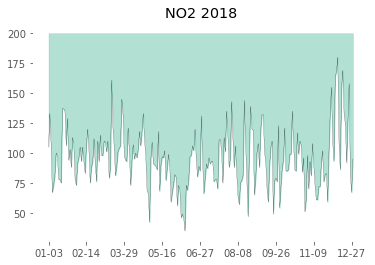

In [14]:
pollutant=['NO2', 'PM10', 'PM25', 'O3', 'CO_8h'] 
year=['2018', '2017', '2016', '2015', '2014']
def plot(pollutant, year):
    area_plot(ds[year], pollutant, max_daily[pollutant], mode[pollutant])
plot('NO2', '2018')